<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/01_Supervised_learning/10_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVMs)

SVM is a classifier that tries to find the optimal decision boundary (called a hyperplane) by maximizing the margin between different classes.

* It picks the line (hyperplane) that maximizes the margin ie the distance between the closest point from each class to the line. These closest points are called the **support vectors**.

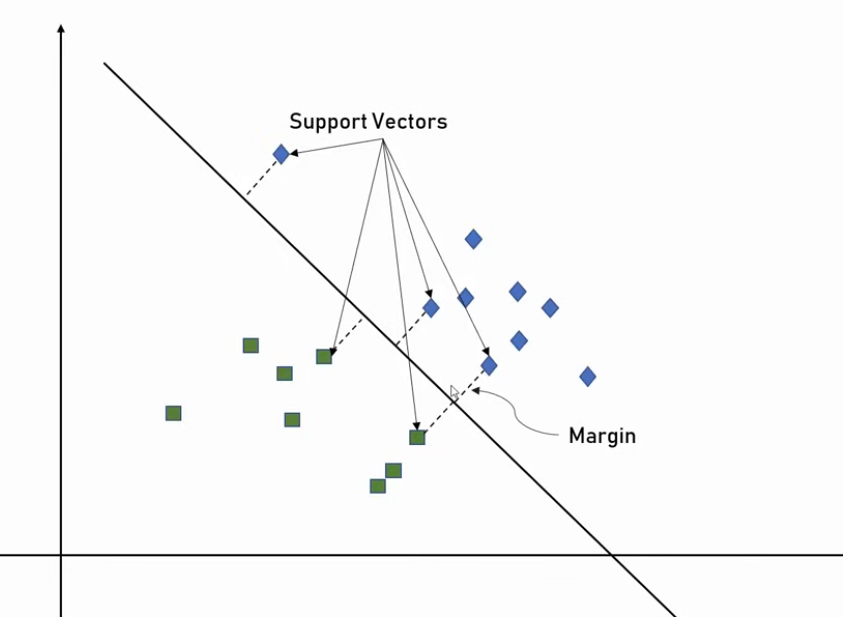


* C (Regularization Parameter): Controls the trade-off between maximizing margin and minimizing classification errors. High C creates a narrower margin but fewer misclassifications. Low C creates a wider margin but allows more misclassifications.

* Gamma (for RBF kernel): Controls the influence of individual training examples. High gamma means nearby points have high influence (can lead to overfitting). Low gamma means distant points have influence (smoother decision boundary).


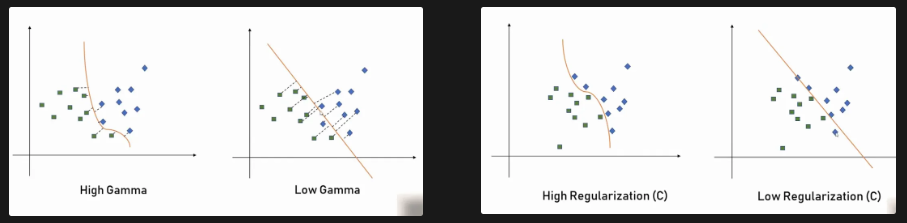

* One of SVM's most powerful features is the kernel trick, which allows it to find non-linear decision boundaries by implicitly mapping data to higher-dimensional spaces.

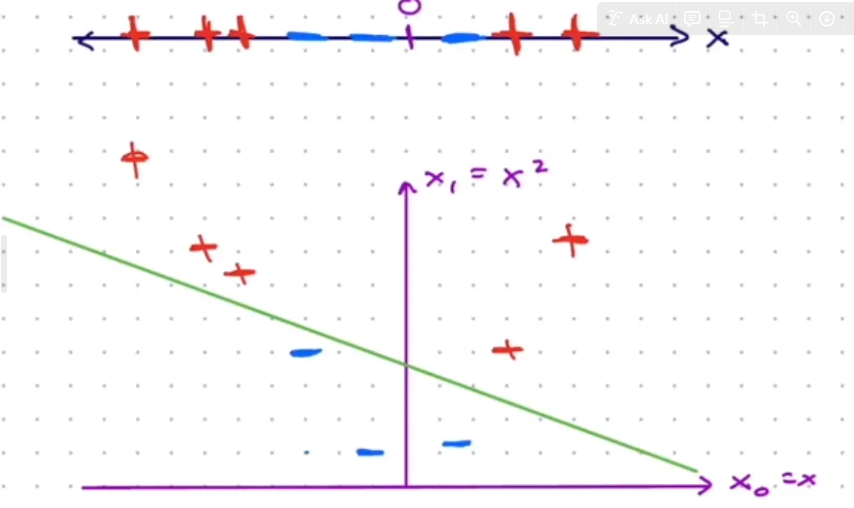

* Evolution of the core idea: Max Margin classifier (perfectly linearly seperable data) → Support Vector Classifier (allows errors) → SVM (handles non-linear patterns)

In this notebook we will use [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) dataset from sklearn library

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [8]:
import matplotlib.pyplot as plt

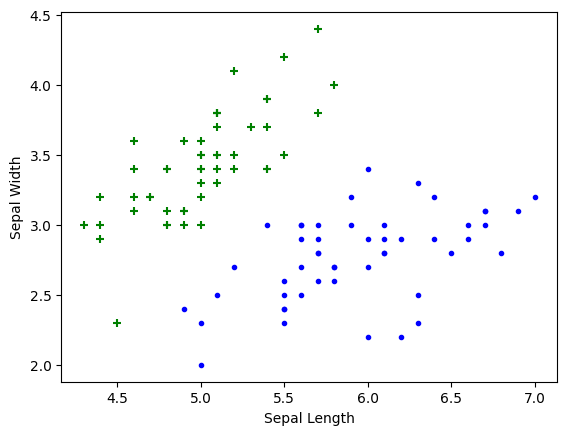

In [9]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

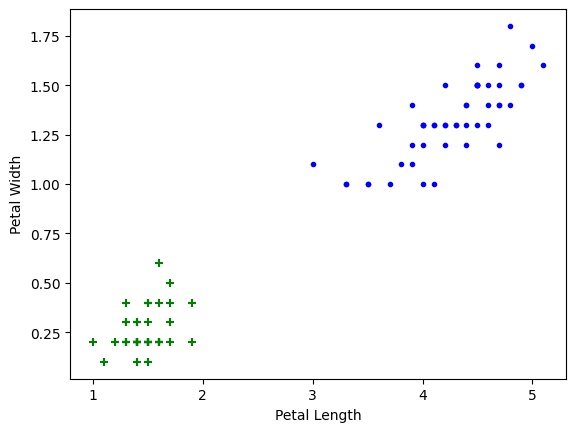

In [10]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

Train using SVM

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.svm import SVC
model = SVC()

In [15]:
model.fit(X_train, y_train)

SVC()

In [16]:
model.score(X_test, y_test)

1.0

In [17]:
model.predict([[4.8,3.0,1.5,0.3]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

Tune parameters

## 1. Regularization (C)

In [20]:
model_C1 = SVC(C=1)
model_C1.fit(X_train, y_train)
model_C1.score(X_test, y_test)

1.0

In [21]:
model_C2 = SVC(C=10)
model_C2.fit(X_train, y_train)
model_C2.score(X_test, y_test)

1.0

## 2. Gamma

In [22]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

## 3. Kernel

In [23]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
model_linear_kernal.score(X_test, y_test)

1.0